In [61]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Definindo as colunas do banco de dados ao ser utilizado

In [51]:
colunas = ["competencia","sexo","tipomovimentacao","salario","racacor"]
meses = ["maio"]

Definindo o caminho do arquivo a ser lido

In [52]:
ferms = ('C:/Users/Henrique/WebstormProjects/untitled/data/2020/' + str(meses[0]) + '/Caged_'+ str(meses[0]) +'.txt')

Lendo o Arquivo CSV, utilizando apenas as colunas necessarias

In [53]:
df = pd.read_csv(dataSet, encoding='iso-8859-1', delimiter=";", header = 0, error_bad_lines=False,usecols= colunas)

Transformando os valores dos dados para texto

In [54]:
Sexo = {1: 'Masculinho', 3: 'Feminino'}
Raca = {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não Informado',7:'Não Indentificado'}
df['sexo'] = df['sexo'].map(Sexo)
df['racacor'] = df['racacor'].map(Raca)
df['Contratado/Desligado'] = df['tipomovimentacao'].apply(lambda x: "Contratado" if x==10 or x==20 or x==25 or x==35 or x==70 else "Desligado")

**3. Quantidade de admissões/demissões por gênero no período da pandemia**

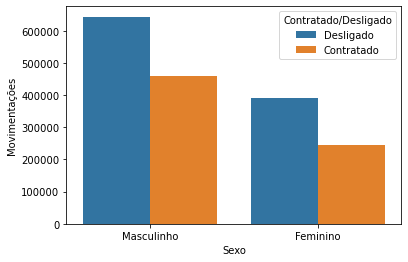

In [55]:
sns.countplot(x='sexo', data=df, hue='Contratado/Desligado')
plt.xlabel('Sexo')
plt.ylabel('Movimentações')
plt.show()

**4.A/B Diferença salarial entre homens e mulheres admitidos e demitidos**

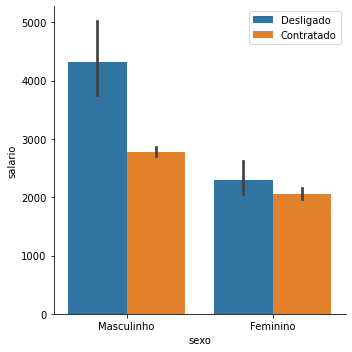

In [56]:
sns.catplot(data=df,x = 'sexo', y='salario', hue='Contratado/Desligado', kind="bar",legend=False)
plt.legend(loc='upper right')
plt.show()

**4.C Média salarial por raça/cor**

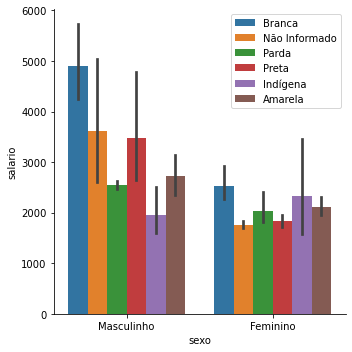

In [57]:
sns.catplot(data=df, x='sexo', y='salario', hue='racacor', kind="bar", legend=False)
plt.legend(loc='upper right')
plt.show()

Definindo os valores dos Tipos de Movimentações por texto

In [58]:
tipoMovementacao = {10: 'Admissão por primeiro emprego', 20: 'Admissão por reemprego',25: 'Admissão por contrato trabalho prazo determinado',
                    31: 'Desligamento por demissão sem justa causa',32: 'Desligamento por demissão com justa causa', 33: 'Culpa Recíproca',
                    35: 'Admissão por reintegração', 40: 'Desligamento a pedido',43: 'Término contrato trabalho prazo determinado', 
                    45: 'Desligamento por Término de contrato',50: 'Desligamento por aposentadoria', 60: 'Desligamento por morte',70: 'Admissão por transferência', 
                    80: 'Desligamento por transferência',90: 'Desligamento por Acordo entre empregado e empregador', 98: 'Desligamento de Tipo Ignorado',
                    99: 'Não Identificado'}

df['tipomovimentacao'] = df['tipomovimentacao'].map(tipoMovementacao)

**5.A Causas de demissão formalizadas pelos empregadores distribuídas por sexo** 

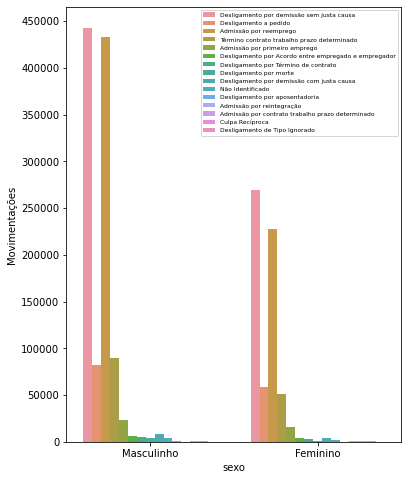

In [59]:
plt.figure(figsize=(6,8))
sns.countplot(data=df, x='sexo', hue='tipomovimentacao')
plt.legend(loc='upper right',prop={'size':6})
plt.locator_params(axis="y", nbins=10)
plt.ylabel('Movimentações')
plt.show()

**5.B Causas de demissão formalizadas pelos empregadores distribuídas por Raça/Cor** 

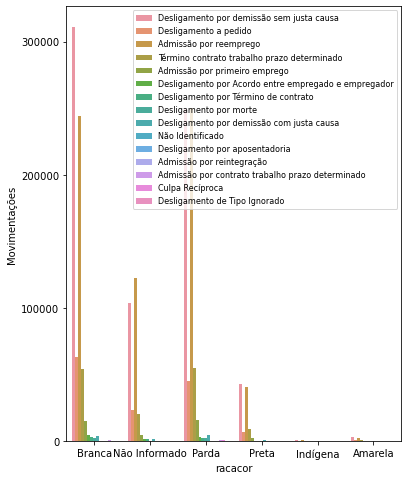

In [60]:
plt.figure(figsize=(6,8))
sns.countplot(data=df, x='racacor', hue='tipomovimentacao')
plt.legend(loc='upper right',prop={'size':8})
plt.locator_params(axis="y", nbins=5)
plt.ylabel('Movimentações')
plt.show()